In [249]:
def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

In [250]:
symbol ='NIFTY'
lot = 50
# today = '13-Sep-2022'

day = 26
month ='Sep'
year = '2022'


In [ ]:
if day < 10 :
    val ='0'+str(day)
    today = val+"-"+month+"-"+year
else:
    today = str(day)+"-"+month+"-"+year
# today

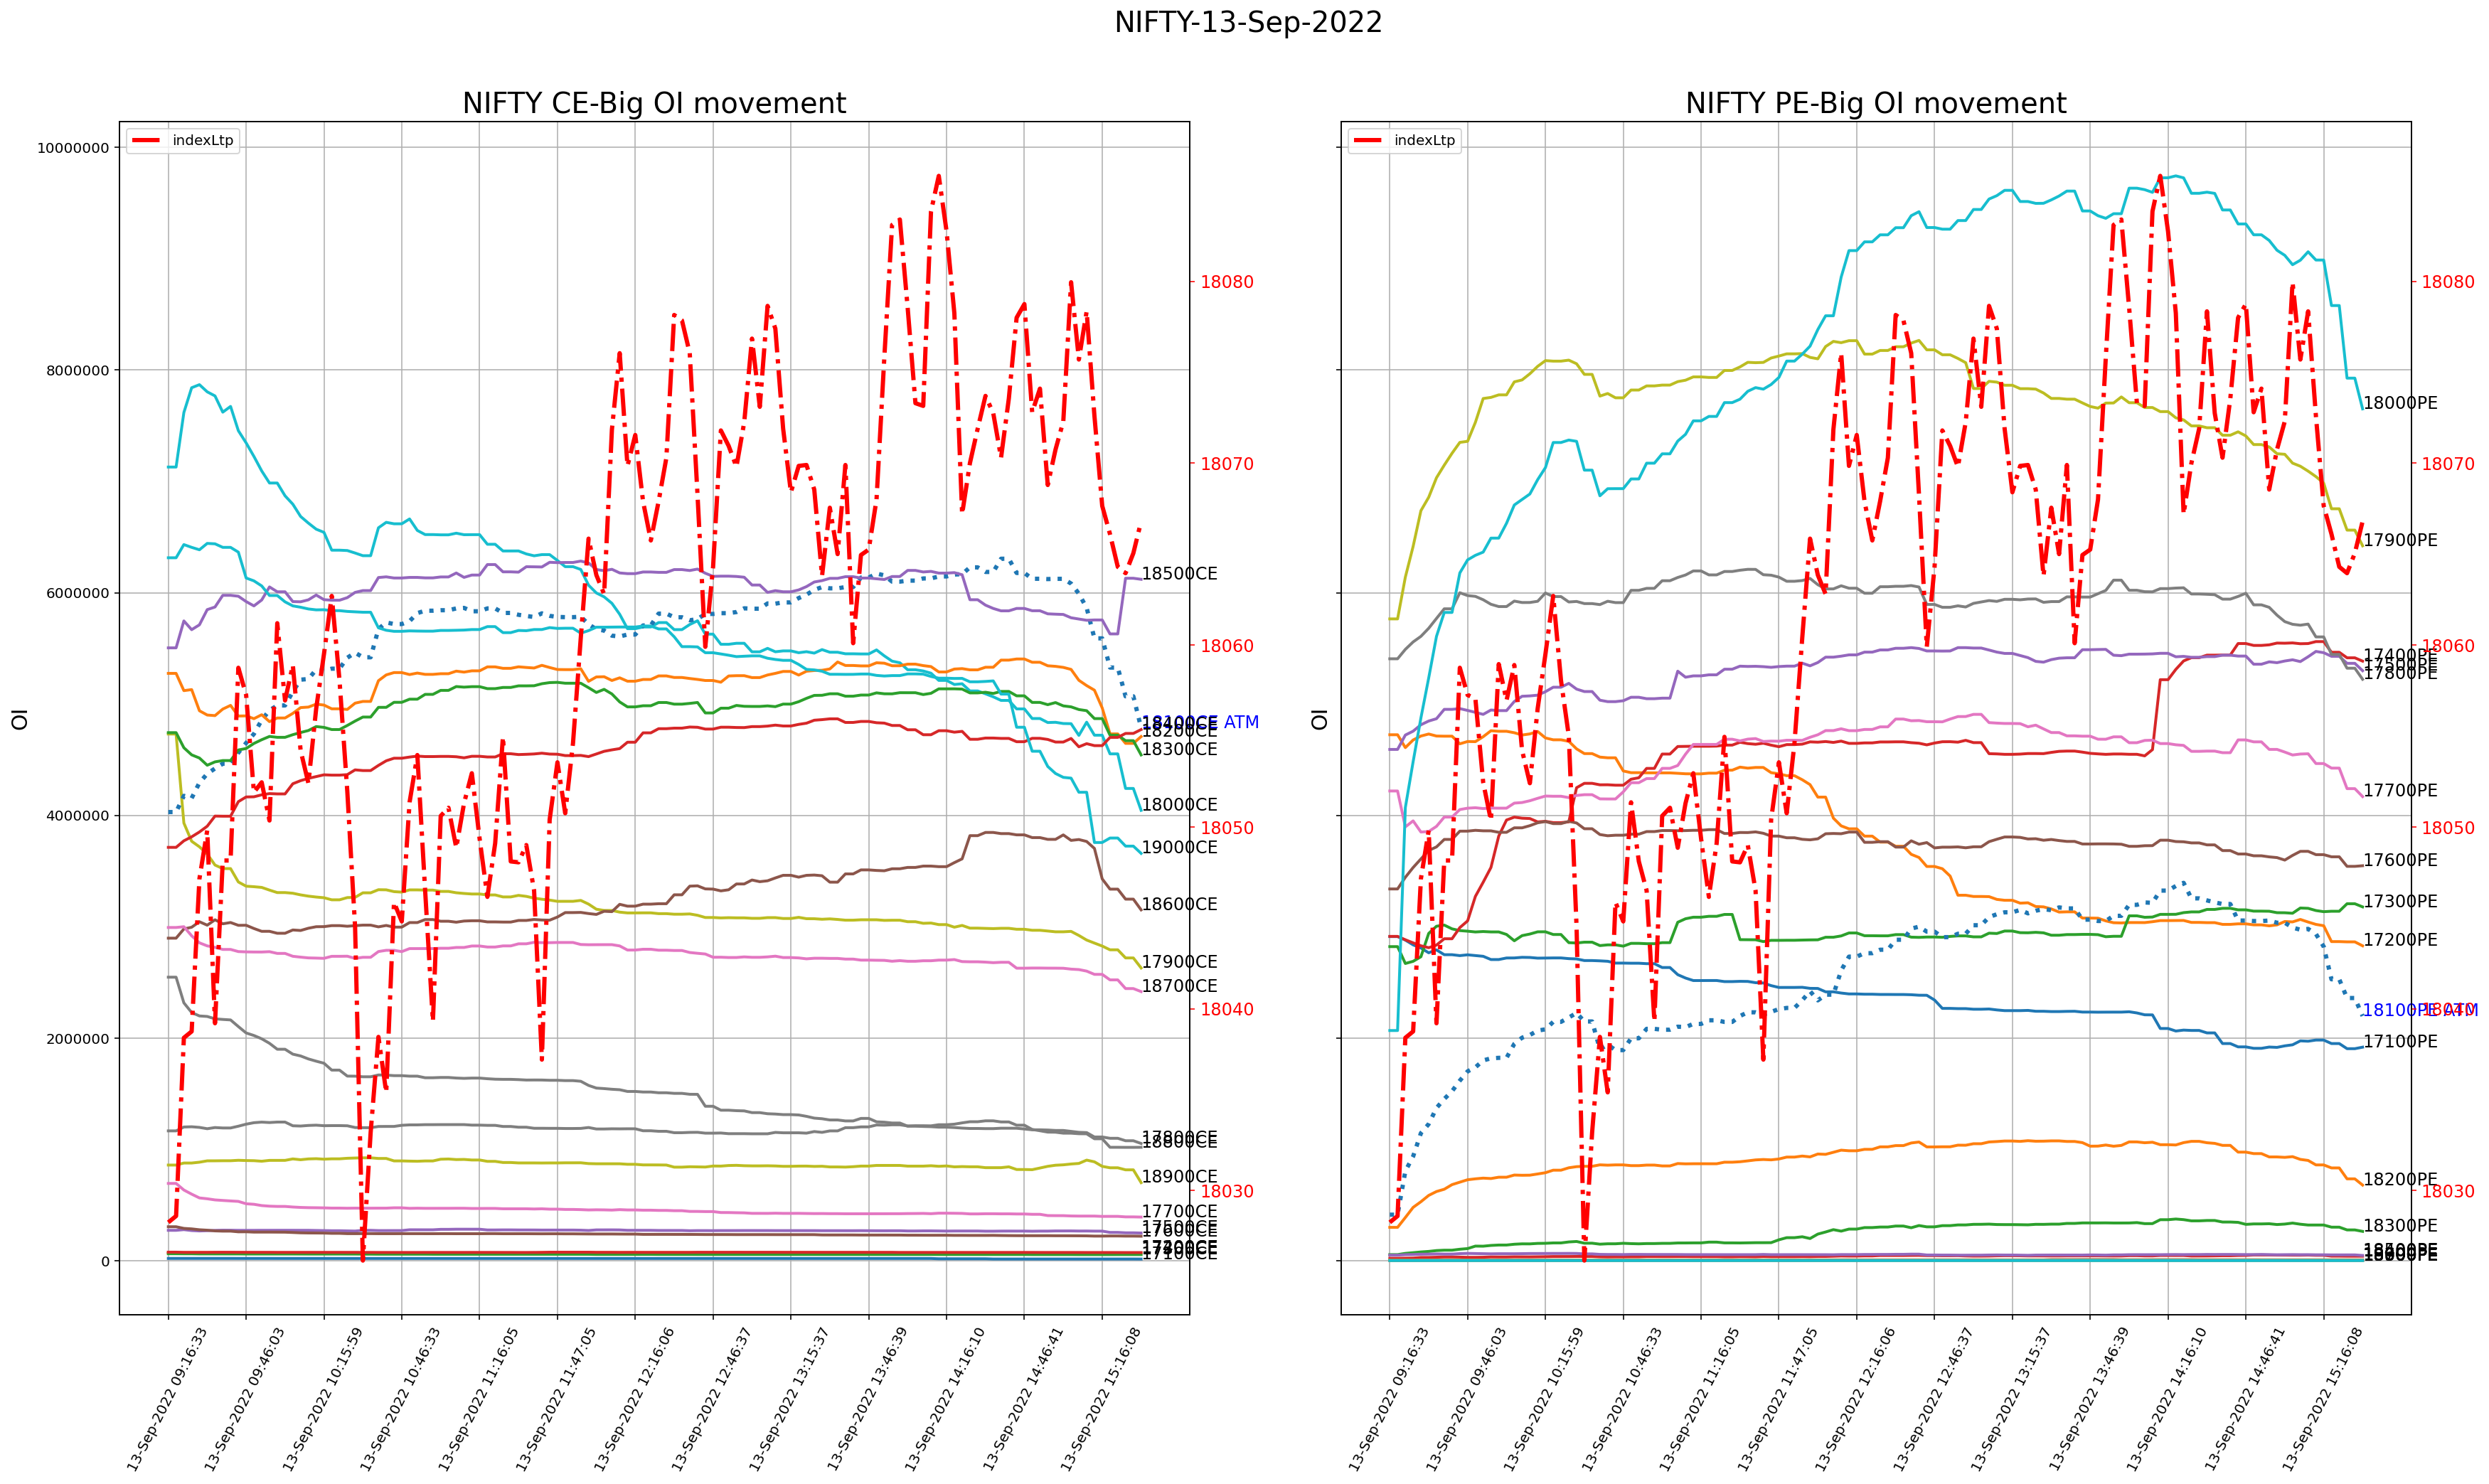

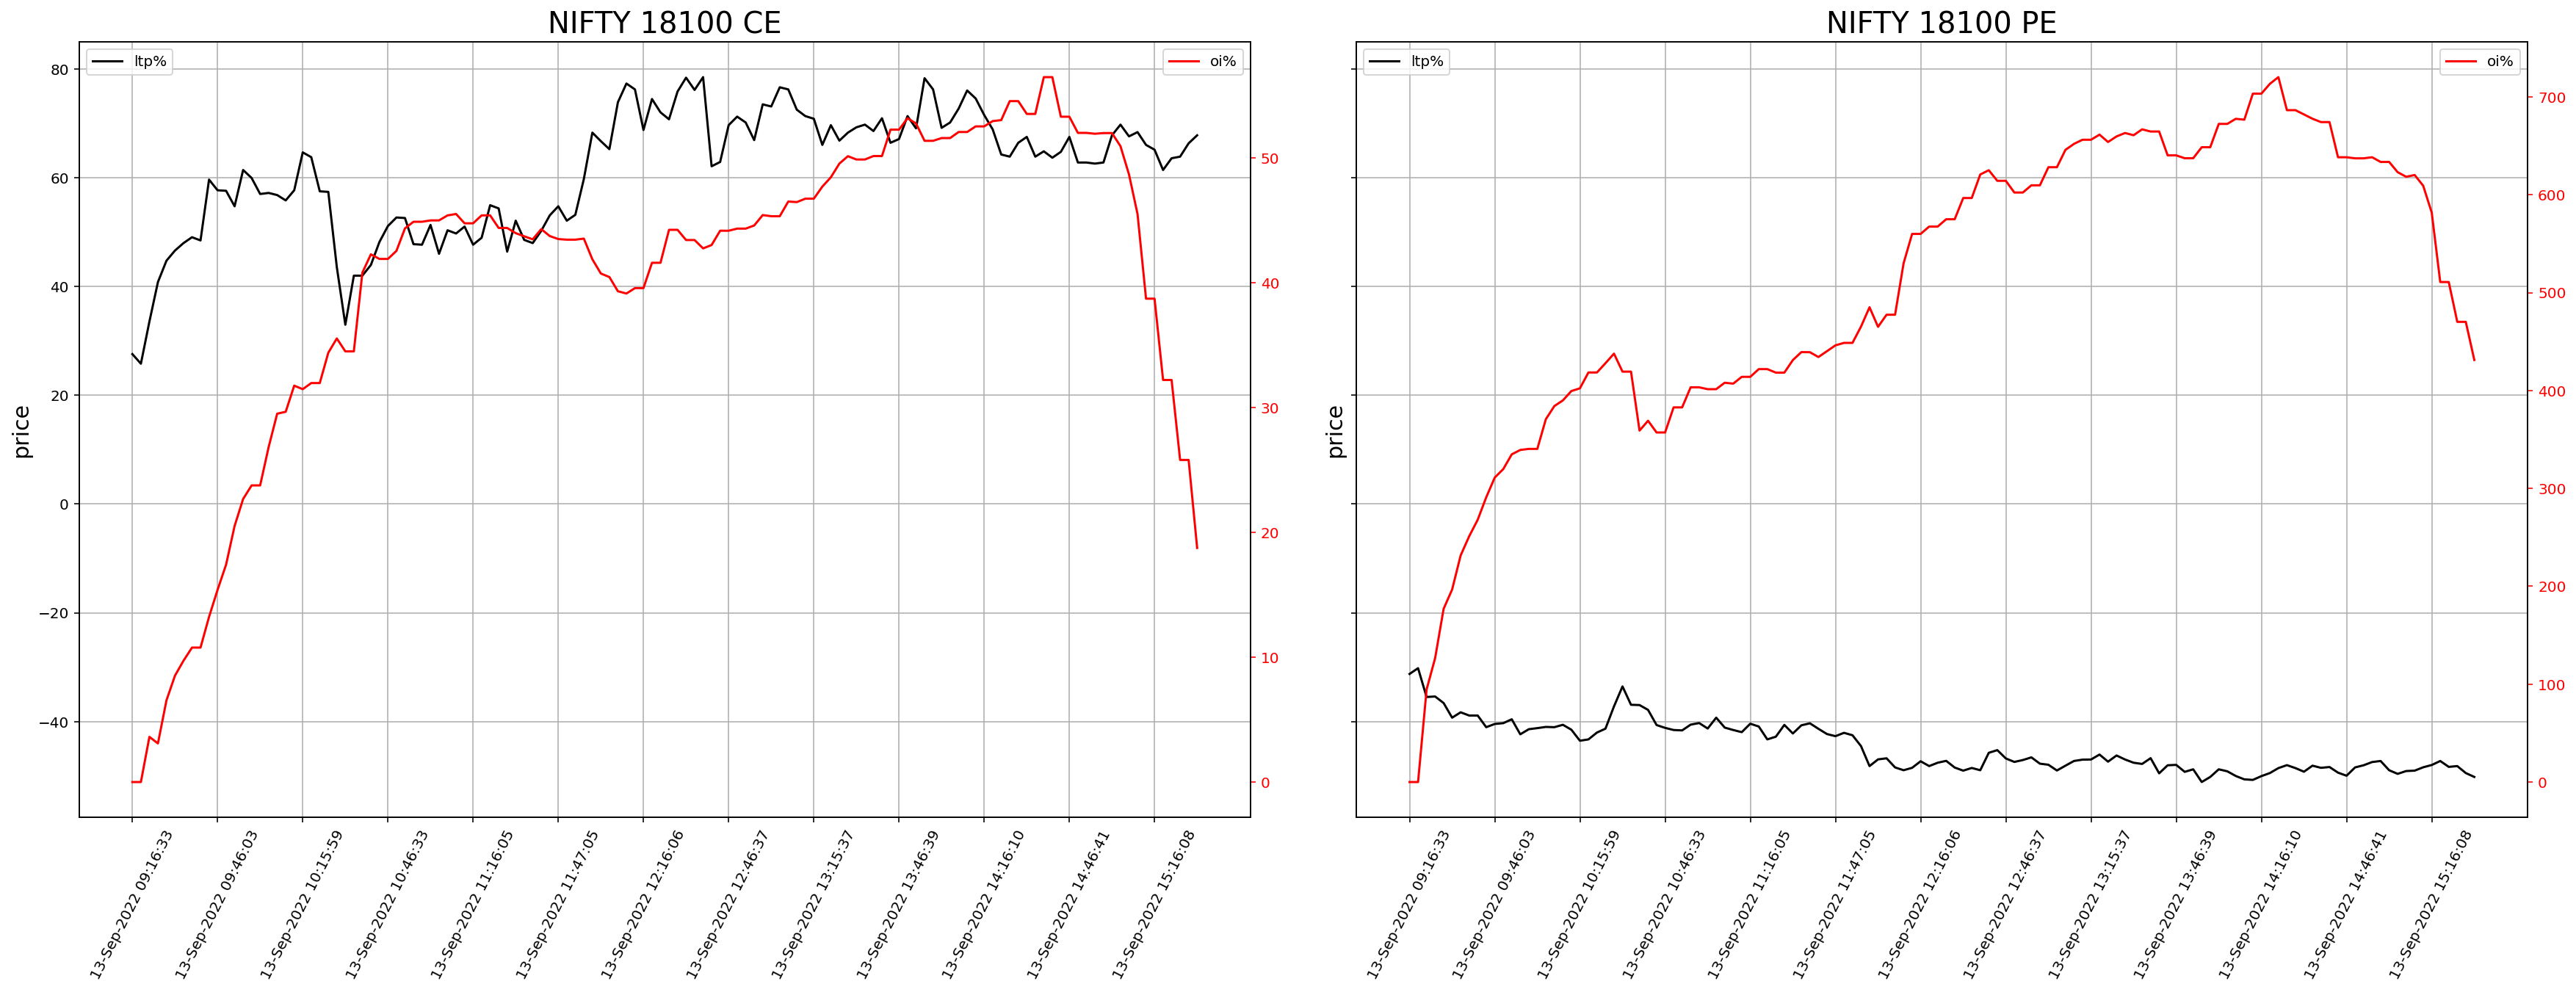

In [251]:
 # today = get_today_date()
# today = '13-Sep-2022'

def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

# today = get_today_date()


def get_hh_mm_time(data_df):
    data_df["Time"] = pd.to_datetime(data_df["Time"])
    data_df["Time"] = data_df["Time"].dt.strftime('%H:%M')
    return data_df

def get_path_filename(filename):
    path='D:\Jupyter Python\Stocks-office\json-csv\\'
    newFilename=path+filename
    return newFilename

def get_big_oi_csv(symbol,option):
        # today = get_today_date()
        # today = '14-Sep-2022'
        filename = symbol + f'-{option}-FULL-OPTION-CHAIN-' + today + ".csv"
        filename=get_path_filename(filename)
        df=pd.read_csv(filename)
        return df

def get_big_oi_df(df,lot):
    
    df.columns=['timestamp','strike', 'expiry', 'index', 'oi','oi_change', 
                            'oi%','iv', 'ltp', 'ltp_change', 'ltp%', 'underlying']   
    df[["oi","oi_change"]]=df[["oi","oi_change"]]*lot
    
    return df

def get_option_plot(g1,strike,option,ax):
    ax3 = ax.twinx()
#     ax3 = ax.twiny()

    df=g1.get_group(strike)
    # ax.plot(df["timestamp"],df["ltp"],label='ltp',color='black')
    # ax3.plot(df['timestamp'], df['oi'],label='oi',color='red') 
    ax.plot(df["timestamp"],df["ltp%"],label='ltp%',color='black')
    ax3.plot(df['timestamp'], df['oi%'],label='oi%',color='red') 

    ax.grid()
    ax3.tick_params('y', colors='red')

    ax.set_xticks(np.arange(0, len(df)+1, 10))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(63)

    ax3.ticklabel_format(style='plain',axis='y') # scientific notation off

    ax.set_title(f"{symbol} {strike} {option}",size=20)
    ax.set_ylabel("price",size ='15')
    leg1 = ax3.legend()
    leg = ax.legend(loc="upper left")

    

def get_big_oi_plot(g1,min_,max_,option,ax):
    # Specify that we will be using a twin x axis
    ax3 = ax.twinx()

    for group in range(min_,max_,100):
        gf=g1.get_group(group).reset_index()
        ax.set_xticks(np.arange(0, len(gf)+1, 10))# tick labels every (10*3=30)30 min
        for tick in ax.get_xticklabels():  # rotating labels using ax parameter
            tick.set_rotation(63)

        if gf['strike'][0] == val:
            ax.plot(gf['timestamp'],gf['oi'],label = str(gf["strike"][0]),ls=":",linewidth='3')
            ax.text(gf['timestamp'].iloc[-1], gf['oi'].iloc[-1], str(gf['strike'].iloc[-1])+f'{option}'+' ATM', size=12,color='blue')# offsetting ATM strike labels
            ax.grid()
        else:
            ax.plot(gf['timestamp'],gf['oi'],label = str(gf["strike"][0]),ls="-",linewidth='2')
            ax.text(gf['timestamp'].iloc[-1], gf['oi'].iloc[-1], str(gf['strike'].iloc[-1])+f'{option}', size=12)

        # ax.text(gf['timestamp'].iloc[-1], gf['oi'].iloc[-1], str(gf['strike'].iloc[-1])+f'{option}', size=12)# printing text labels, adding CE after converting to string
        ax.set_title(f"{symbol} {option}-Big OI movement",size=20)
        ax.set_ylabel("OI",size ='15')
        ax.tick_params('y', colors='black')     # 'y' because we want to change the y axis
        ax3.tick_params('y', colors='red', labelsize = 'large') # label size parameter
#         leg = ax.legend() # for legends you need to have labels in plot function
        ax.ticklabel_format(style='plain',axis='y') # scientific notation off
    ax3.plot(gf['timestamp'], gf['underlying'],color='red',linewidth='3',ls='-.',label='indexLtp')
    ax3.legend(loc='upper left')# not repeating plot as 1st group header value first row was overwritten so outside for loop

        
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

# symbol ='BANKNIFTY'
# lot = 25
# today = get_today_date()


df_ce = get_big_oi_csv(symbol,'CE') # read csv file by option type
df_pe = get_big_oi_csv(symbol,'PE') # read csv file by option type

df_ce_clean = get_big_oi_df(df_ce,lot)
df_pe_clean = get_big_oi_df(df_pe,lot)

val=int(df_ce_clean["underlying"].iloc[-1]) # getting value of ATM strike
val =round(val/100)*100
max_=val+1000
min_ = val-1000

g1_ce=df_ce_clean.groupby("strike") # group by strike
g1_pe=df_pe_clean.groupby("strike") # group by strike

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,15),sharey=True)#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
plt.suptitle(symbol+f"-{today}",size=20)

get_big_oi_plot(g1_ce,min_,max_,'CE',ax1) # plotting big OI plots
get_big_oi_plot(g1_pe,min_,max_,'PE',ax2) # plotting big OI plots
fig.tight_layout(pad=3)
plt.show()
#Get ATM option chart here
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,10),sharey=True)#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
get_option_plot(g1_ce,val,'CE',ax1)
get_option_plot(g1_pe,val,'PE',ax2)

fig.tight_layout(pad=3)
plt.show()

   

In [252]:
# newdf.columns

## CE details

In [253]:
df_list=[]
for group in range(min_,max_,100):
        gf=g1_ce.get_group(group).reset_index()
        df_list.append(gf.iloc[-1:])
        
newdf=pd.concat(df_list)
newdf[["oi","oi_change"]]=round(newdf[["oi","oi_change"]]/100000,2)
newdf=newdf[['timestamp', 'strike', 'expiry', 'index', 'oi', 'oi_change',
       'oi%', 'iv', 'ltp', 'ltp_change', 'ltp%', 'underlying']]
newdf=round(newdf,2)
newdf.sort_values(by='oi',ascending=False).head()

,timestamp,strike,expiry,index,oi,oi_change,oi%,iv,ltp,ltp_change,ltp%,underlying
125,13-Sep-2022 15:30:00,18500,15-Sep-2022,NIFTY,61.20,6.16,11.19,16.39,2.5,0.15,6.38,18066.8
125,13-Sep-2022 15:30:00,18100,15-Sep-2022,NIFTY,47.86,7.56,18.75,18.07,85.5,34.55,67.81,18066.8
125,13-Sep-2022 15:30:00,18400,15-Sep-2022,NIFTY,47.71,10.58,28.50,15.57,5.7,1.35,31.03,18066.8
125,13-Sep-2022 15:30:00,18200,15-Sep-2022,NIFTY,47.08,-5.68,-10.76,17.07,43.3,18.00,71.15,18066.8
125,13-Sep-2022 15:30:00,18300,15-Sep-2022,NIFTY,45.43,-2.00,-4.22,16.09,17.5,6.90,65.09,18066.8


## PE details

In [254]:
df_list=[]
for group in range(min_,max_,100):
        gf=g1_pe.get_group(group).reset_index()
        df_list.append(gf.iloc[-1:])
        
newdf=pd.concat(df_list)
newdf[["oi","oi_change"]]=round(newdf[["oi","oi_change"]]/100000,2)

newdf=newdf[['timestamp', 'strike', 'expiry', 'index', 'oi', 'oi_change',
       'oi%', 'iv', 'ltp', 'ltp_change', 'ltp%', 'underlying']]
newdf=round(newdf,2)
newdf.sort_values(by='oi',ascending=False).head()

,timestamp,strike,expiry,index,oi,oi_change,oi%,iv,ltp,ltp_change,ltp%,underlying
125,13-Sep-2022 15:30:00,18000,15-Sep-2022,NIFTY,76.51,55.84,270.03,17.87,60.00,-83.00,-58.04,18066.8
125,13-Sep-2022 15:30:00,17900,15-Sep-2022,NIFTY,64.21,6.56,11.39,19.10,35.10,-61.00,-63.48,18066.8
125,13-Sep-2022 15:30:00,17400,15-Sep-2022,NIFTY,53.85,24.72,84.85,27.37,4.20,-5.40,-56.25,18066.8
125,13-Sep-2022 15:30:00,17500,15-Sep-2022,NIFTY,52.99,7.07,15.39,25.18,5.45,-9.80,-64.26,18066.8
125,13-Sep-2022 15:30:00,17800,15-Sep-2022,NIFTY,52.22,-1.84,-3.41,20.37,20.65,-41.05,-66.53,18066.8
